In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2

In [2]:
df_raw = pd.read_excel('db_v0.xlsx')

In [38]:
df_processed = df_raw.copy()

## Eliminacion de registros sin informacion de mora o pago


Se eliminaran los registros que a la fecha de corte de la base de datos , no llegaron a la fecha de pago, por lo tal no se tiene informacion de si pagaran o estaran en mora, por lo que no es de utilidad para el entrenamiento del mododelo


In [39]:
df_processed = df_processed[df_processed['CAPITAL.1'] == 0]

In [40]:
df_processed.shape

(117654, 60)

In [48]:
df_raw['ID_USUARIO'][df_raw['ID_USUARIO']==5511].value_counts()

ID_USUARIO
5511    47
Name: count, dtype: int64

## Generacion de columna de numero de prestamos que ha realizado la misma persona


Debido a que la columna 'ID_USUARIO' por si sola no es de utilidad para el modelo, antes de hacer la eliminacion de esta se utilizara para obtener informacion relevante, como el numero de veces que un mismo 'ID_USUARIO' ha solicitado un credito.


In [41]:
df_processed['NUM.CREDITOS SOLICITADOS'] = df_processed.groupby('ID_USUARIO').cumcount() + 1 

In [98]:
df_processed[['ID_USUARIO','NUM.CREDITOS SOLICITADOS']][df_processed['ID_USUARIO']==156]

,ID_USUARIO,NUM.CREDITOS SOLICITADOS
155,156,1
73026,156,2
83182,156,3
93316,156,4


## Eliminacion de columnas redundantes o innecesarias


Para decidir cuales columnas deben eliminarse, se tomo encuenta el conocimiento del negocio por parte de la empresa LUMON y se realizo un analisis para seleccionar que columnas son resultado de operaciones entre otras.


In [8]:
columns_to_drop = ['ID_USUARIO', 'ID CREDITO', 'PRODUCTO', 'MONEDA', 'CUOTAS',
       'PERIODICIDAD CUOTAS','TASA CORRIENTE', 'TASA SEGURO','FECHA DESEMBOLSO','PRÓXIMA FECHA PAGO',
       'TASA AVAL', 'IVA AVAL', 'DESC AVAL', 'DESC AVAL AL DESEMB','Cuotas pagadas',
       'GESTIÓN DIGITAL', 'DESC. X INCLUSION', 'IVA GEST DIG',
       'COD. PROMO DESC.', 'FACTURA VENTA','GESTIÓN DIGITAL.1', 'IVA',
       'VALOR DESEMBOLSADO', 'VALOR FUTURO', 'CAPITAL.1',
       'CAPITAL EN MORA', 'INT CORRIENTE.1', 'SEGURO.1', 'GESTIÓN DIGITAL.2',
       'IVA.1','GAC','Cuotas Futuras', 'ESTADO 1', 'ESTADO 2',
       'DEUDA A LA FECHA', 'DEUDA TOTAL CRÉDITO'    
]

In [9]:
df_processed = df_processed.drop(columns_to_drop, axis=1)

In [10]:
df_processed.columns

Index(['PLAZO', 'CAPITAL', 'INT CORRIENTE', 'SEGURO', 'DÍAS MORA', 'INT MORA',
       'Cuotas en mora', 'TIPO EMPLEO', 'CIUDAD RESIDENCIA', 'TRABAJO',
       'TIPO DE VIVIENDA', 'ESTRATO', 'AÑOS EN LA VIVIENDA',
       'INGRESOS MENSUALES', 'GASTOS MENSUALES', 'INGRESOS ADICIONALES',
       'TIPO DE CONTRATO', 'PERIODO DE PAGO', 'ESTADO CIVIL',
       'NIVEL EDUCATIVO', 'PERSONAS A CARGO', 'NUMERO DE HIJOS',
       'TIPO DE VEHICULO', 'TIEMPO TRABAJO', 'NUM.CREDITOS SOLICITADOS'],
      dtype='object')

## Divsion del data set


Como se observo en el EDA , los datos de la Informacion de los usuarios, tienen un 97% de datos nulos, por lo cual se decide dividir el data set, dejando uno que contenga todas las columnas pero solo con los registros que no tengan datos nulos en la Informacion de los usuarios, y otro dataset con todos los registros sin incluir las columnas de informacion de los usuarios.


In [11]:
df_users_info = df_processed.dropna(subset='TIPO EMPLEO')

In [12]:
df_users_info.columns

Index(['PLAZO', 'CAPITAL', 'INT CORRIENTE', 'SEGURO', 'DÍAS MORA', 'INT MORA',
       'Cuotas en mora', 'TIPO EMPLEO', 'CIUDAD RESIDENCIA', 'TRABAJO',
       'TIPO DE VIVIENDA', 'ESTRATO', 'AÑOS EN LA VIVIENDA',
       'INGRESOS MENSUALES', 'GASTOS MENSUALES', 'INGRESOS ADICIONALES',
       'TIPO DE CONTRATO', 'PERIODO DE PAGO', 'ESTADO CIVIL',
       'NIVEL EDUCATIVO', 'PERSONAS A CARGO', 'NUMERO DE HIJOS',
       'TIPO DE VEHICULO', 'TIEMPO TRABAJO', 'NUM.CREDITOS SOLICITADOS'],
      dtype='object')

In [13]:
users_info_columns = ['TIPO EMPLEO', 'CIUDAD RESIDENCIA', 'TRABAJO',
       'TIPO DE VIVIENDA', 'ESTRATO', 'AÑOS EN LA VIVIENDA',
       'INGRESOS MENSUALES', 'GASTOS MENSUALES', 'INGRESOS ADICIONALES',
       'TIPO DE CONTRATO', 'PERIODO DE PAGO', 'ESTADO CIVIL',
       'NIVEL EDUCATIVO', 'PERSONAS A CARGO', 'NUMERO DE HIJOS',
       'TIPO DE VEHICULO', 'TIEMPO TRABAJO']

df_reduced = df_processed.drop(users_info_columns,axis=1)

In [49]:
df_reduced.shape

(117654, 5)

## Analisis de correlacion entre variables


In [15]:
df_reduced.corr()

,PLAZO,CAPITAL,INT CORRIENTE,SEGURO,DÍAS MORA,INT MORA,Cuotas en mora,NUM.CREDITOS SOLICITADOS
PLAZO,1.000000,0.132103,0.304032,0.132103,-0.025933,0.003159,0.031821,0.026476
CAPITAL,0.132103,1.000000,0.953679,1.000000,-0.235231,-0.098516,-0.131759,0.350948
INT CORRIENTE,0.304032,0.953679,1.000000,0.953679,-0.233943,-0.102127,-0.098750,0.314401
SEGURO,0.132103,1.000000,0.953679,1.000000,-0.235231,-0.098516,-0.131760,0.350948
DÍAS MORA,-0.025933,-0.235231,-0.233943,-0.235231,1.000000,0.811162,0.605124,-0.211287
INT MORA,0.003159,-0.098516,-0.102127,-0.098516,0.811162,1.000000,0.714194,-0.164490
Cuotas en mora,0.031821,-0.131759,-0.098750,-0.131760,0.605124,0.714194,1.000000,-0.228029
NUM.CREDITOS SOLICITADOS,0.026476,0.350948,0.314401,0.350948,-0.211287,-0.164490,-0.228029,1.000000


<Axes: >

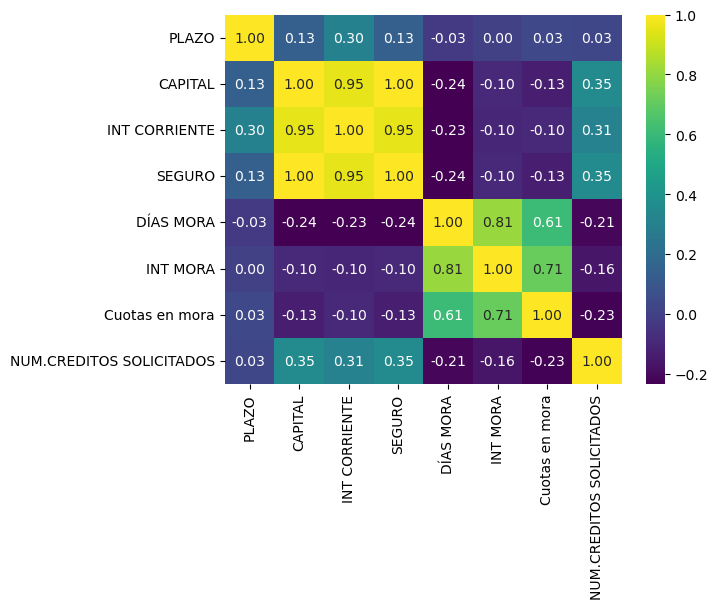

In [16]:
sns.heatmap(df_reduced.corr(), cmap='viridis', annot=True, fmt='.2f')

## Eliminacion de columnas con corelaciones altas


In [17]:
columns_highly_related = ['INT CORRIENTE','SEGURO','INT MORA']
df_reduced = df_reduced.drop(columns_highly_related,axis=1)
df_users_info = df_users_info.drop(columns_highly_related,axis=1)

<Axes: >

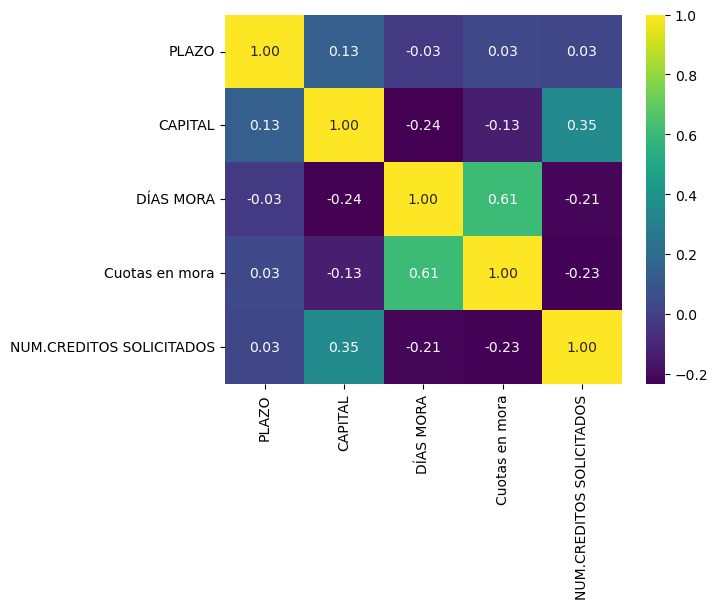

In [18]:
sns.heatmap(df_reduced.corr(), cmap='viridis', annot=True, fmt='.2f')

## Eliminacion de outliers multivariable


### Dadaframe reducido


In [19]:
df = df_reduced.copy()

In [20]:
#### Detectando datos outliers con la distandia de Mahalanobis

mu = df.mean().values ### Calculando la media de los datos
Sigma_inv = np.linalg.inv(df.cov().values) #### Calculando la inversa de la mtriz de covarianzas

centered = df - mu  ### Centrando los datos
centered = centered.to_numpy() ## par hacer multiplicacion de matrices es mejor llevar los dataframes a arrays

MD2 = np.matmul(np.matmul(centered, Sigma_inv),centered.transpose()) ### Usando la formula de la distancia de mahalanobis

MD2 = np.diag(MD2) ## Extrayendo la diagonal que mide la distancia al centroide de los puntos


In [22]:
alpha = 0.01
cut_off = chi2.ppf(1-alpha, len(df.columns)) ### Chi cuadrado con 1-alpha % y p grados de libertad
##### los grados de libertad p son la cantidad de variables es decir el largo de el vector de nombres de las columans


### Calculando el porcentaje de recorte con la metodologia de Mahal con significancia de alpha
print(f"Porcentaje de recorte: {round(100 * len(MD2[MD2 > cut_off])/len(df), 2)}%")

Porcentaje de recorte: 7.89%


In [28]:
df_clean = df_reduced.copy()
df_clean["out"] = "0"
df_clean.loc[MD2 > cut_off, "out"] = "1"
df_clean = df_clean[df_clean['out']=="0"]

In [30]:
df_clean.shape

(108375, 6)

### Dataframe info usuarios


In [54]:
df = df_users_info.select_dtypes(include=['int64', 'float64'])

In [80]:
df_catergoticos = df_users_info.select_dtypes(include=['object'])

In [56]:
df.columns

Index(['PLAZO', 'CAPITAL', 'DÍAS MORA', 'Cuotas en mora', 'ESTRATO',
       'INGRESOS MENSUALES', 'GASTOS MENSUALES', 'INGRESOS ADICIONALES',
       'PERSONAS A CARGO', 'NUMERO DE HIJOS', 'NUM.CREDITOS SOLICITADOS'],
      dtype='object')

In [86]:
#### Detectando datos outliers con la distandia de Mahalanobis

mu = df.mean().values ### Calculando la media de los datos
Sigma_inv = np.linalg.inv(df.cov().values) #### Calculando la inversa de la mtriz de covarianzas

centered = df - mu  ### Centrando los datos
centered = centered.to_numpy() ## par hacer multiplicacion de matrices es mejor llevar los dataframes a arrays

MD2 = np.matmul(np.matmul(centered, Sigma_inv),centered.transpose()) ### Usando la formula de la distancia de mahalanobis

MD2 = np.diag(MD2) ## Extrayendo la diagonal que mide la distancia al centroide de los puntos

In [93]:
alpha = 0.01
cut_off = chi2.ppf(1-alpha, len(df.columns)) ### Chi cuadrado con 1-alpha % y p grados de libertad
##### los grados de libertad p son la cantidad de variables es decir el largo de el vector de nombres de las columans


### Calculando el porcentaje de recorte con la metodologia de Mahal con significancia de alpha
print(f"Porcentaje de recorte: {round(100 * len(MD2[MD2 > cut_off])/len(df), 2)}%")

Porcentaje de recorte: 0.87%


In [88]:
df_clean2 = df.copy()
df_clean2["out"] = "0"
df_clean2.loc[MD2 > cut_off, "out"] = "1"
df_clean2 = df_clean2[df_clean2['out']=="0"]

In [89]:
df_users_clean = df_clean2.join(df_catergoticos, how='inner')

In [90]:
df_users_clean.shape

(4103, 23)

### Guardar los datos en stage


In [97]:
ruta1 = 'users.csv'
df_users_clean.to_csv(ruta1, index=False) 

In [96]:
ruta2 = 'reducido.csv'
df_clean.to_csv(ruta2, index=False) 